## **Question 2**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.ticker as ticker

cars_df = pd.read_excel('dataset_1/cars_1.xlsx')

## Cleaning the data

In [24]:
cars_df.head()

,Brand,Type,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
0,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,13495
1,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,16500
2,alfa-romero,hatchback,94.5,171.2,65.5,52.4,2823,6,152,9.0,154,19,26,16500
3,audi,sedan,99.4,176.6,66.4,54.3,2824,5,136,8.0,115,18,22,17450
4,audi,sedan,99.8,177.3,66.3,53.1,2507,5,136,8.5,110,19,25,15250


In [25]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              195 non-null    object 
 1   Type               195 non-null    object 
 2   Wheel-base         195 non-null    float64
 3   Length             195 non-null    float64
 4   Width              195 non-null    float64
 5   Height             195 non-null    float64
 6   Curb-weight        195 non-null    int64  
 7   Cylinders          195 non-null    int64  
 8   Engine             195 non-null    int64  
 9   Compression-ratio  195 non-null    float64
 10  Horsepower         195 non-null    int64  
 11  City-mpg           195 non-null    int64  
 12  Highway-mpg        195 non-null    int64  
 13  Price              195 non-null    int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 21.5+ KB


In [26]:
#Dropping Type and Description
cleaned_cars = cars_df.drop(['Type', 'Brand'], axis=1)

cleaned_cars.describe()

,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,98.922564,174.221538,65.891795,53.844615,2561.241026,4.435897,128.302564,10.192923,103.682051,25.394872,30.846154,13404.030769
std,6.170323,12.676557,2.158735,2.427168,530.969429,1.030336,41.903740,4.063489,38.280455,6.525365,6.940611,8254.170806
min,86.600000,141.100000,60.300000,47.800000,1488.000000,3.000000,61.000000,7.000000,48.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.050000,52.000000,2134.000000,4.000000,98.000000,8.500000,70.000000,19.000000,25.000000,7649.000000
50%,97.000000,173.200000,65.400000,54.100000,2420.000000,4.000000,120.000000,9.000000,95.000000,25.000000,30.000000,10245.000000
75%,102.400000,184.600000,66.900000,55.650000,2964.500000,4.000000,146.000000,9.400000,116.000000,30.500000,36.500000,16594.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,12.000000,326.000000,23.000000,262.000000,49.000000,54.000000,45400.000000


In [27]:
scaler = StandardScaler() # StandardScaler object
scaler.fit(cleaned_cars) # fit scaler on original data

scaled_data = pd.DataFrame(scaler.transform(cleaned_cars), columns = cleaned_cars.columns) # standardize data
scaled_data.head()

,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
0,-1.677243,-0.428783,-0.832157,-2.083746,-0.025002,-0.424153,0.040612,-0.294327,0.191659,-0.675240,-0.555578,0.011049
1,-1.677243,-0.428783,-0.832157,-2.083746,-0.025002,-0.424153,0.040612,-0.294327,0.191659,-0.675240,-0.555578,0.376045
2,-0.718592,-0.238970,-0.181960,-0.596718,0.494252,1.521959,0.566976,-0.294327,1.317839,-0.982525,-0.700029,0.376045
3,0.077575,0.188110,0.236024,0.188103,0.496140,0.548903,0.184166,-0.541054,0.296420,-1.136167,-1.277830,0.491434
4,0.142569,0.243472,0.189581,-0.307573,-0.102418,0.548903,0.184166,-0.417691,0.165469,-0.982525,-0.844479,0.224216


## Implementing PCA

In [28]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components = 12).fit(scaled_data)
#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(scaled_data)

In [29]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

## Plotting Screeplots and Scoreplots

<Figure size 640x480 with 0 Axes>

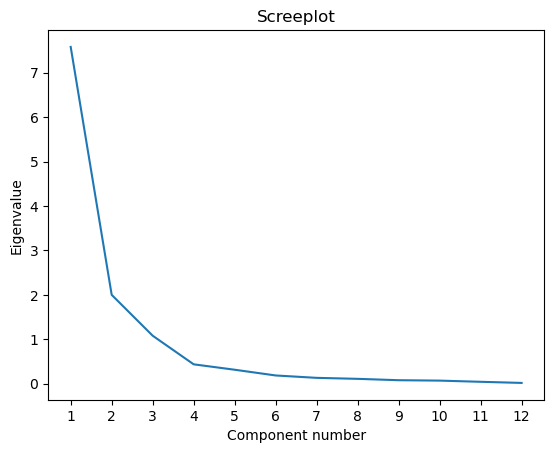

,Eigenvalue,Explained Variance,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
PC 1,7.5782,0.6283,0.2780,0.3217,0.3217,0.1031,0.3492,0.2662,0.3307,0.0019,0.3077,-0.3122,-0.3221,0.3273
PC 2,2.0008,0.1659,-0.3786,-0.2438,-0.1767,-0.5350,-0.0932,0.2186,0.1303,-0.4954,0.2996,-0.2065,-0.1566,0.0634
PC 3,1.0815,0.0897,-0.1227,-0.1356,0.0469,-0.3656,0.0432,0.3895,0.2701,0.6048,0.0507,0.3212,0.2939,0.2152
PC 4,0.4378,0.0363,-0.0154,-0.1253,-0.2260,0.5930,-0.1530,0.5710,0.1468,-0.3265,-0.0594,0.2048,0.1839,0.1564
PC 5,0.3161,0.0262,-0.4582,-0.1332,-0.4102,0.3830,0.0752,-0.1655,-0.0518,0.4320,0.3059,-0.2700,-0.2130,0.1520
PC 6,0.1871,0.0155,-0.0211,-0.0042,-0.0417,-0.0245,0.0228,0.5130,-0.0609,0.2334,-0.2730,-0.2393,-0.3644,-0.6408
PC 7,0.1334,0.0111,-0.3196,-0.3073,0.7035,0.1341,-0.2373,0.1023,-0.3362,0.0349,-0.1373,-0.1059,-0.1285,0.2509
PC 8,0.1112,0.0092,-0.3249,0.3261,0.3063,0.1462,0.0098,0.0459,-0.0413,-0.0542,0.5662,0.1578,0.3114,-0.4729
PC 9,0.0803,0.0067,0.2514,-0.7389,0.1655,0.1418,0.2785,-0.1683,0.2647,-0.0265,0.2356,0.1479,-0.0852,-0.2865
PC 10,0.0713,0.0059,-0.5198,0.1010,0.1254,0.0776,0.4298,-0.1762,0.4607,-0.1497,-0.4920,0.0312,0.0465,-0.0473


In [30]:
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()
pca_results = pca_results(scaled_data, pca) # use function created to show table
pca_results

In [31]:
pca2 = PCA(n_components = 3).fit(scaled_data) # fit a PCA object to extract first 2 PCs
pca2_results = pca2.transform(scaled_data)
pca_components_df = pd.DataFrame(pca2.components_, columns = scaled_data.columns) # Linear system for PC1 and PC2
pca_components_df = pca_components_df.rename(index = {0:'PC1', 1:'PC2', 2: 'PC3'})
pca_components_df

,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
PC1,0.277979,0.321686,0.321682,0.103079,0.349180,0.266185,0.330652,0.001915,0.307748,-0.312220,-0.322087,0.327255
PC2,-0.378565,-0.243844,-0.176709,-0.534964,-0.093205,0.218563,0.130335,-0.495369,0.299615,-0.206541,-0.156646,0.063365
PC3,-0.122679,-0.135637,0.046858,-0.365581,0.043250,0.389548,0.270105,0.604756,0.050719,0.321182,0.293897,0.215166


In [32]:
def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.2

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax

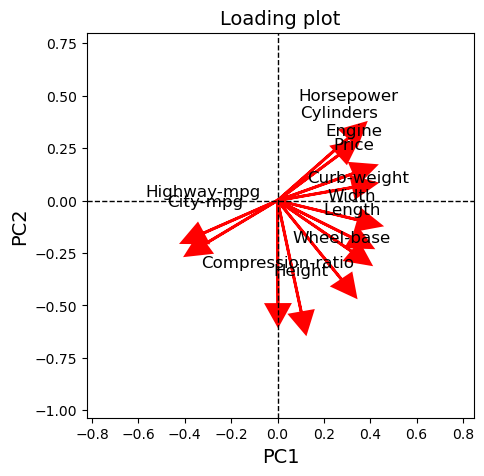

In [33]:
plt.clf
ax2 = loadingplot(scaled_data, pca)  # Students to fill in
plt.show()

In [36]:
type_data = pd.concat([cars_df['Brand'], scaled_data], axis = 1) # combine original data with standardized data

def calc_line(protein, fat, carb, sugar, vitA, vitB6, vitB12, calcium): # calculate direction on biplot using nutrient values
    variables = pd.DataFrame([[protein, fat, carb, sugar, vitA, vitB6, vitB12, calcium]], columns = cleaned_cars.columns) # create dataframe for values
    variables_scaled = scaler.transform(variables)[0] # standardize the values (using fit from original data) and make into 1d array
    calc_pc1 = np.dot(np.array(pca2.components_)[0], variables_scaled) # calculate pc1
    calc_pc2 = np.dot(np.array(pca2.components_)[1], variables_scaled) # calculate pc2

    return calc_pc1, calc_pc2

fig = px.scatter(pca2_results, x=0, y=1, color=type_data['Brand']) # create 2D scoreplot for PC1 and PC2
fig.update_layout(
    xaxis_title="PC1",
    yaxis_title="PC2",
    legend_title="Brand",
    width = 1500, 
    height = 1300
)

loadings = pca2.components_.T * np.sqrt(pca2.explained_variance_) # calculate loadings for the PCA

# # add loadings to the plot
features = list(scaled_data.columns) 
for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )

fig.show()